<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/The_Variance_is_Not_Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

16:35:01 Starting...
16:35:01 Installing yfinance into Google notebook...
16:35:14 Installing arch into Google notebook...
16:35:23 Initialized.


In [2]:
ticker,begin,end,name='^GSPC','1928-01-27',today('%Y-%m-%d'),'S&P 500 Index'
df=download(ticker,begin,end).dropna()
df['Daily Return']=df['Adj Close'].pct_change()*hundred
df['Intraday Return']=df['Close']/df['Open']*hundred-hundred
df['Overnight Return']=(hundred+df["Daily Return"])/(hundred+df["Intraday Return"])*hundred-hundred
df.index=pd.DatetimeIndex(df.index).to_period('B')
df.dropna(inplace=True)
df.loc[df["Volume"]==0,"Volume"]=np.nan
display(df)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Intraday Return,Overnight Return
Date,,,,,,,,,
1928-01-30,17.490000,17.490000,17.490000,17.490000,17.490000,NaN,-1.130587,0.000000,-1.130587
1928-01-31,17.570000,17.570000,17.570000,17.570000,17.570000,NaN,0.457404,0.000000,0.457404
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,NaN,-0.227655,0.000000,-0.227655
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,NaN,0.570442,0.000000,0.570442
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,NaN,-1.304592,0.000000,-1.304592
...,...,...,...,...,...,...,...,...,...
2024-06-04,5278.240234,5298.799805,5257.629883,5291.339844,5291.339844,3.707900e+09,0.150281,0.248181,-0.097658
2024-06-05,5314.479980,5354.160156,5297.640137,5354.029785,5354.029785,3.591460e+09,1.184765,0.744190,0.437321
2024-06-06,5357.799805,5362.350098,5335.359863,5352.959961,5352.959961,3.609990e+09,-0.019982,-0.090333,0.070415


begin         end      middle      mean   variance sample  \
                                                                       
Year                                                                   
1928  1928-01-30  1928-12-31  1928-07-16  0.142928   0.902165    231   
1929  1929-01-02  1929-12-31  1929-07-02 -0.023030   5.518972    249   
1930  1930-01-02  1930-12-31  1930-07-02 -0.118062   3.078754    251   
1931  1931-01-02  1931-12-31  1931-07-02 -0.218345   6.866020    252   
1932  1932-01-04  1932-12-30  1932-07-01 -0.007653  11.365781    250   
...          ...         ...         ...       ...        ...    ...   
2020  2020-01-02  2020-12-31  2020-07-02  0.083217   4.704339    253   
2021  2021-01-04  2021-12-31  2021-07-02  0.097952   0.681002    252   
2022  2022-01-03  2022-12-30  2022-07-01 -0.074544   2.318887    251   
2023  2023-01-03  2023-12-29  2023-07-03  0.090210   0.680249    250   
2024  2024-01-02  2024-06-10  2024-03-21  0.107723   0.493239    111   

             F                          
     statistic       p Value  critical  
Year                                    
1928       NaN           NaN       NaN  
1929  6.117474  2.558182e-39  1.237897  
1930  0.557849  9.999977e-01  1.231838  
1931  2.230129  1.808801e-10  1.231036  
1932  1.655367  3.604395e-05  1.231201  
...        ...           ...       ...  
2020  7.621188  5.035750e-51  1.230527  
2021  0.144760  1.000000e+00  1.230466  
2022  3.405112  2.058730e-21  1.230975  
2023  0.293352  1.000000e+00  1.231487  
2024  0.725085  9.729301e-01  1.294775  

[97 rows x 9 columns]

17:34:16 Number of failing years 36 versus expected 4 at 95% confidence.


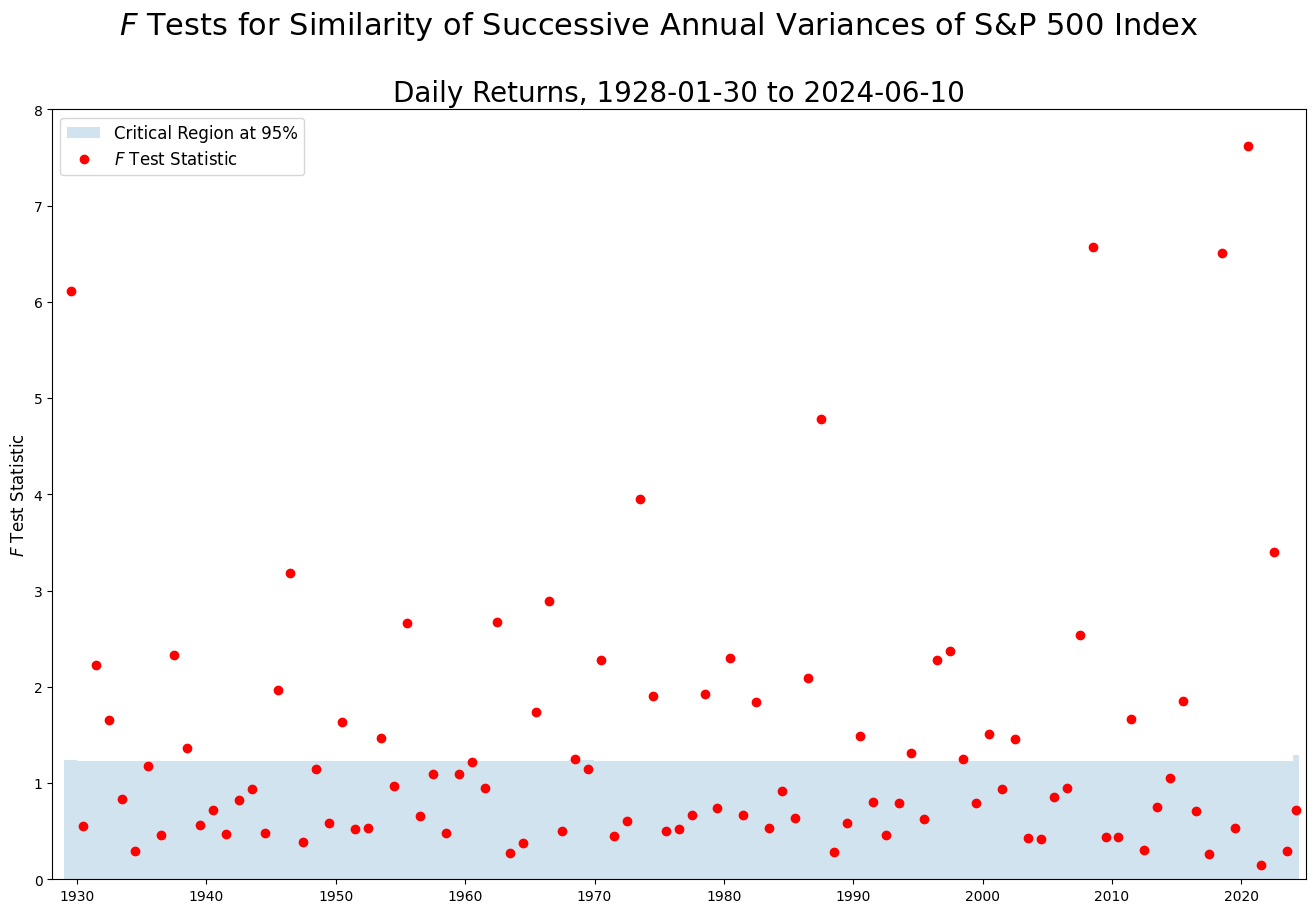

In [18]:
from scipy.stats import f,t

# add fields to help with grouping
df['Year']=df.index.year
df['Date']=df.index

# aggregate by year
grouped=df.groupby('Year')
annual=pd.DataFrame({'Year':list(set(df.index.year))}).set_index('Year')
annual['begin']=grouped['Date'].min()
annual['end']=grouped['Date'].max()
annual['middle']=annual['begin']+(annual['end']-annual['begin']).apply(lambda x:x.n)//2
annual['mean']=grouped['Daily Return'].mean()
annual['variance']=grouped['Daily Return'].var()
annual['sample']=grouped['Daily Return'].count()

# statistics
annual[('F','statistic')]=annual['variance']/annual['variance'].shift()
annual[('F','p Value')]=f(annual['sample'],annual['sample'].shift()).sf(annual[('F','statistic')])
annual[('F','critical')]=f(annual['sample'],annual['sample'].shift()).isf(alpha:=five/hundred)

annual.columns=pd.MultiIndex.from_tuples(map(lambda x:x if isinstance(x,tuple) else (x,''),annual.columns))
display(annual)

# charting
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.stairs(annual[('F','critical')],[df.index[0].to_timestamp()]+list(annual['end'].apply(pd.Period.to_timestamp)),fill=True,alpha=0.2,label='Critical Region at %g%%' % ((one-alpha)*hundred))
plot.plot(annual['middle'].apply(pd.Period.to_timestamp),annual[('F','statistic')],'ro',label='$F$ Test Statistic')
plot.set_ylim(zero,None)
plot.set_xlim(df.index[0],(df.index[-1].asfreq('A-DEC')+1).to_timestamp())
figure.suptitle(title:="$F$ Tests for Similarity of Successive Annual Variances of %s" % name,fontsize=22)
plot.set_title(subtitle:='Daily Returns, %s to %s' % (df.index[0],df.index[-1]),fontsize=20)
plot.legend(fontsize=12)
plot.set_ylabel('$F$ Test Statistic',fontsize=12)
figure.savefig(title.replace('$','')+'.png',dpi=300,bbox_inches='tight')

# summary
nprint("Number of failing years %d versus expected %d at %g%% confidence." % (annual[annual[('F','statistic')]>annual[('F','critical')]].shape[0],
                                                           alpha*annual[('F','statistic')].count(),(one-alpha)*hundred))

  0%|          | 0/96 [00:00<?, ?it/s]

W                                  t                    
                 statistic       p Value           statistic   p Value
Year                                                                  
1929  29.867621  29.867621  7.459788e-08  1.000442  1.000442  0.317603
1930   0.404471   0.404471  5.250814e-01  0.512733  0.512733  0.608365
1931  16.427645  16.427645  5.858096e-05  0.504118  0.504118  0.614400
1932  14.984031  14.984031  1.228011e-04 -0.782136 -0.782136  0.434505
1933   3.306400   3.306400  6.962092e-02 -0.704358 -0.704358  0.481545
...         ...        ...           ...       ...       ...       ...
2020  46.826658  46.826658  2.262427e-11  0.141707  0.141707  0.887368
2021  39.655183  39.655183  6.611919e-10 -0.100824 -0.100824  0.919730
2022  65.372271  65.372271  4.694393e-15  1.580273  1.580273  0.114675
2023  61.195971  61.195971  3.104123e-14 -1.504887 -1.504887  0.132986
2024   3.085347   3.085347  7.985297e-02 -0.194545 -0.194545  0.845860

[96 rows x 6 columns]

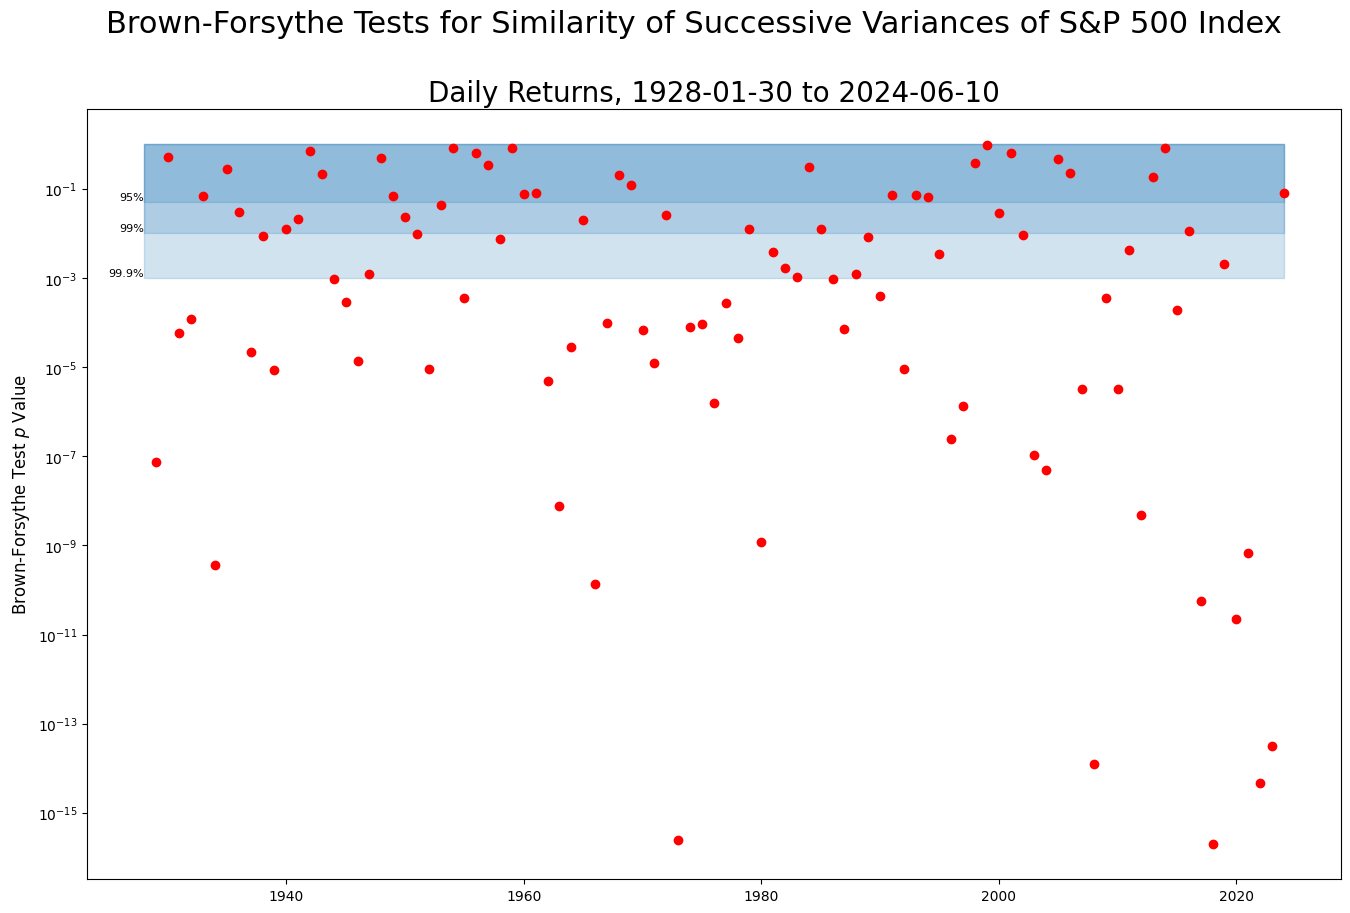

In [24]:
from scipy.stats import levene,ttest_ind

for year in (p:=tqdm(annual.index[1:])):
    p.set_description(str(year))
    annual.loc[year,("W",'statistic')]=(l:=levene(df.loc[df.index.year==year-1,"Daily Return"],df.loc[df.index.year==year,"Daily Return"],center='median')).statistic
    annual.loc[year,("W",'p Value')]=l.pvalue
    annual.loc[year,("t",'statistic')]=(t:=ttest_ind(df.loc[df.index.year==year-1,"Daily Return"],df.loc[df.index.year==year,"Daily Return"])).statistic
    annual.loc[year,("t","p Value")]=t.pvalue

display(annual[["W","t"]].dropna())

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(annual.index,annual['W p Value'],'ro')
plot.set_yscale('log')

for alpha in five/hundred,one/hundred,one/thousand:
    #plot.axhline(alpha,color='black',alpha=0.2,linestyle=':')
    plot.fill_between(annual.index,one,alpha,color='C0',alpha=0.2)
    plot.text(annual.index[0],alpha,"%g%%" % ((one-alpha)*hundred),ha='right',va='bottom',fontsize=8)

figure.suptitle(title:="Brown-Forsythe Tests for Similarity of Successive Variances of %s" % name,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_ylabel('Brown-Forsythe Test $p$ Value',fontsize=12)
figure.savefig(title.replace('$','')+'.png',dpi=300,bbox_inches='tight')

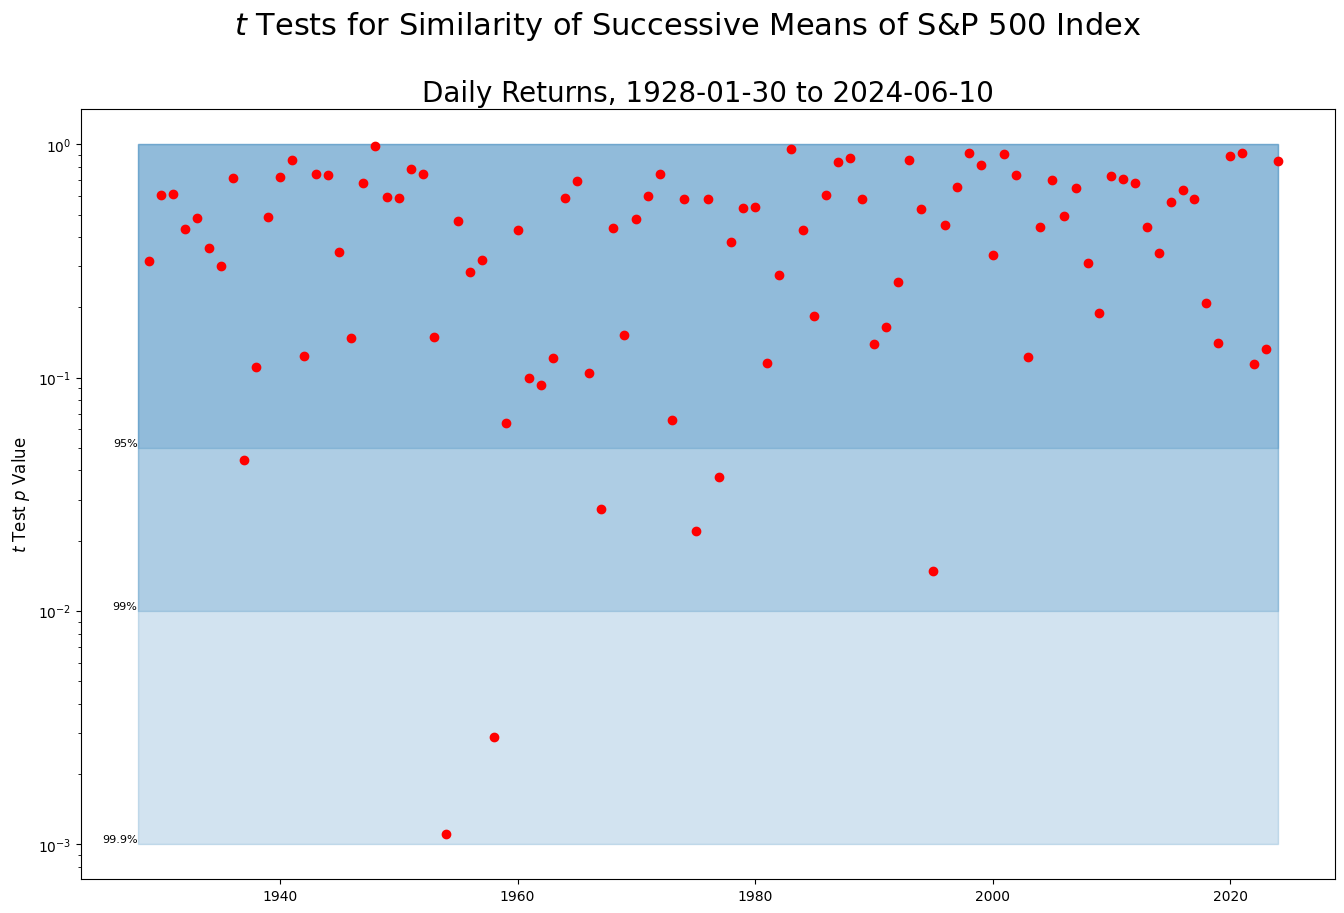

In [5]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(annual.index,annual['t p Value'],'ro')
plot.set_yscale('log')

for alpha in five/hundred,one/hundred,one/thousand:
    plot.fill_between(annual.index,one,alpha,color='C0',alpha=0.2)
    plot.text(annual.index[0],alpha,"%g%%" % ((one-alpha)*hundred),ha='right',va='bottom',fontsize=8)

figure.suptitle(title:="$t$ Tests for Similarity of Successive Means of %s" % name,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_ylabel('$t$ Test $p$ Value',fontsize=12)
figure.savefig(title.replace('$','')+'.png',dpi=300,bbox_inches='tight')